# Advanced Classical Methods

In [1]:
import json
from helper.ConfusionLoss import plot_confusion_loss
import matplotlib.pyplot as plt

with open("../data/articles/train.preprocessed.json") as f:
    data = json.load(f)
    texts = [" ".join(article) for article in data]

with open("../data/articles/train.json") as f:
    data = json.load(f)
    labels = [article["label"] for article in data]


While LDA is probably the most popular topic modeling algorithm, there are other methods that are worth knowing about. In this notebook, we will cover two of them: Non-negative Matrix Factorization (NMF) and Latent Semantic Indexing (LSI), also known as Latent Semantic Analysis (LSA).

Besides these two, you might also want to check out [Correlated Topic Models](https://proceedings.neurips.cc/paper_files/paper/2005/file/9e82757e9a1c12cb710ad680db11f6f1-Paper.pdf), which is very closely related to LDA, or [Structural Topic Model](https://www.structuraltopicmodel.com) for including meta-information..

## Non-negative Matrix Factorization

Non-negative Matrix Factorization (NMF) is a matrix factorization method that is often used for dimensionality reduction. It is similar to PCA, but it only works on non-negative matrices, which makes it suitable for sparse count data.

Given a matrix $X$, NMF finds two matrices $W$ and $H$ such that $X \approx WH$, where $W$ and $H$ will be non-negative.

Using NMF for topic modeling is very similar to LDA. If we have a corpus of documents, where each document is a bag of words, we can interpret each document as being composed of a mixture of topics, where each topic is a distribution over words.
Specifically, we set $X$ to be the document-term matrix of our corpus, e.g. TF-IDF. 
$W$ can now be interpreted as a document-topic matrix, and $H$ as the corresponding topic-term matrix.

NMF is bound by similar constraints as LDA: it is a context-free, BOW model, and hence requires the same preprocessing steps as LDA.

![NMF](../assets/graphics/nmf.png)

NMF, in contrast to LDA, has no hyperparameters except the number of topics. This makes it very easy to use, but it also means that it is less flexible than LDA. For example, it is not possible to use priors to influence the topic distribution.

NMF often produces more coherent topics than LDA, but it is also more prone to overfitting and hence more sensitive to the quality of the corpus and the preprocessing.

### Training NMF with Sklearn

The following code-snippet shows how to perform NMF with sklearn. The code is similar to the LDA code from the previous notebook.

Notice, how fast NMF is compared to LDA! We can perform NMF on the full dataset in less than 5 seconds, while LDA takes multiple minutes.

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

vectorizer = TfidfVectorizer(max_df=0.75, min_df=10)
tfidf = vectorizer.fit_transform(texts)

nmf = NMF(n_components=8, random_state=42)
W = nmf.fit_transform(tfidf)
H = nmf.components_


### Interpreting NMF Models

NMF outputs two matrices: $W$ and $H$. $W$ is a document-topic matrix, and $H$ is a topic-term matrix. We can interpret the topics in the same way as we did for LDA, by looking at the most probable words for each topic.

In [ ]:
predicted_topic_names = []

for i, topic in enumerate(H):
    print(f"Topic {i}")
    print(" ".join([vectorizer.get_feature_names_out()[i]
          for i in topic.argsort()[:-10:-1]]))

    predicted_topic_name = vectorizer.get_feature_names_out()[
        topic.argsort()[:-4:-1]]
    predicted_topic_names.append("_".join(predicted_topic_name))
    print()


Topic 0
patient drug health study people hospital medical researcher care

Topic 1
trump president election republican vote house democrats republicans senate

Topic 2
vaccine virus dose variant booster covid infection delta vaccination

Topic 3
game team player play win season olympic olympics medal

Topic 4
north korea china korean missile nuclear united south chinese

Topic 5
company percent business bank billion market investor year price

Topic 6
facebook company google app apple amazon tech technology user

Topic 7
space nasa launch flight astronaut rocket earth orbit spacecraft



These topics actually look very reasonable! We can check the quality of the model by comparing its predicted topics against the ground-truth labels.

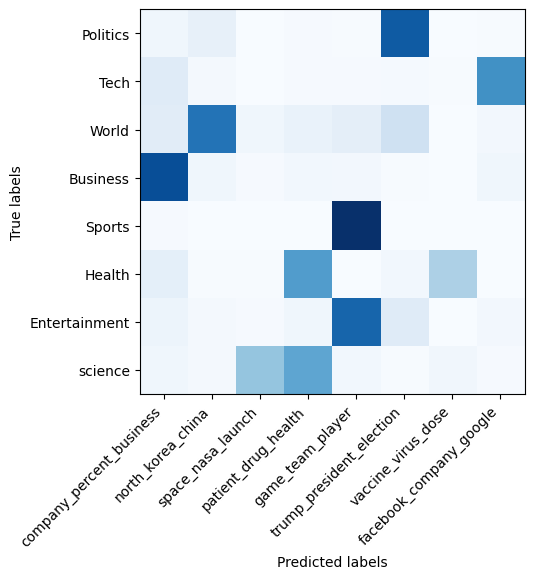

In [ ]:
predicted_topics = W.argmax(axis=1)
predicted_topics = [predicted_topic_names[i] for i in predicted_topics]
plot_confusion_loss(labels, predicted_topics, plot_pred_labels=True)


The coherence-score of $0.43$ is not as good as LDA (or BERTopic, as we will see later), but still decent.

## Latent Semantic Analysis

Latent Semantic Analysis (LSA), also known as Latent Semantic Indexing (LSI), is a method that is very similar to PCA. It is often used for dimensionality reduction, but it can also be used for topic modeling.